In [15]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

In [16]:

# Load data
data = pd.read_excel('02 Churn-Dataset.xlsx')

In [17]:
len(data.columns.to_list())

23

In [18]:
from sklearn.preprocessing import LabelEncoder

In [19]:
le = LabelEncoder()

In [20]:

# Define features and target variable
X = data.drop(columns=['Churn'])
y = data['Churn']

In [21]:
y = data['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

In [22]:
len(X.columns.to_list())

22

In [23]:
print(X.dtypes)
print(y.dtypes)

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
numAdminTickets       int64
numTechTickets        int64
dtype: object
int64


In [24]:
y.dtypes

dtype('int64')

In [25]:
# List categorical columns
categorical_cols = [
    'gender','Partner','Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 
    'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod'
]

# One-hot encode categorical variables
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)  # Avoid dummy variable trap

print(X.head())

   customerID  SeniorCitizen  tenure  MonthlyCharges TotalCharges  \
0  7590-VHVEG              0       1           29.85        29.85   
1  5575-GNVDE              0      34           56.95       1889.5   
2  3668-QPYBK              0       2           53.85       108.15   
3  7795-CFOCW              0      45           42.30      1840.75   
4  9237-HQITU              0       2           70.70       151.65   

   numAdminTickets  numTechTickets  gender_Male  Partner_Yes  Dependents_Yes  \
0                0               0        False         True           False   
1                0               0         True        False           False   
2                0               0         True        False           False   
3                0               3         True        False           False   
4                0               0        False        False           False   

   ...  StreamingTV_No internet service  StreamingTV_Yes  \
0  ...                            False     

In [26]:
from sklearn.preprocessing import LabelEncoder

In [27]:
X.columns

Index(['customerID', 'SeniorCitizen', 'tenure', 'MonthlyCharges',
       'TotalCharges', 'numAdminTickets', 'numTechTickets', 'gender_Male',
       'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [37]:


# binary_cols = ['Dependents', 'PhoneService', 'PaperlessBilling']
# le = LabelEncoder()

# for col in binary_cols:
#     X[col] = le.fit_transform(X[col])  # Convert 'Yes' -> 1, 'No' -> 0


In [29]:
X['TotalCharges'] = pd.to_numeric(X['TotalCharges'], errors='coerce')  # Convert with NaN for errors


In [30]:
X.drop(columns=['customerID'], inplace=True)  # Drop customerID column

In [33]:
# from sklearn.preprocessing import LabelEncoder

# binary_cols = ['Partner', 'MultipleLines']

# le = LabelEncoder()
# for col in binary_cols:
#     X[col] = le.fit_transform(X[col])  # Convert 'Yes' -> 1, 'No' -> 0


In [35]:
# categorical_cols = [
#     'gender', 'InternetService', 'OnlineSecurity', 
#     'OnlineBackup', 'DeviceProtection', 'TechSupport', 
#     'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod'
# ]

# X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)  # Drop first to avoid redundancy


In [38]:
# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [39]:
print(X_train.columns.to_list())

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'numAdminTickets', 'numTechTickets', 'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes', 'MultipleLines_No phone service', 'MultipleLines_Yes', 'InternetService_Fiber optic', 'InternetService_No', 'OnlineSecurity_No internet service', 'OnlineSecurity_Yes', 'OnlineBackup_No internet service', 'OnlineBackup_Yes', 'DeviceProtection_No internet service', 'DeviceProtection_Yes', 'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No internet service', 'StreamingTV_Yes', 'StreamingMovies_No internet service', 'StreamingMovies_Yes', 'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']


In [40]:
X_train.dtypes

SeniorCitizen                              int64
tenure                                     int64
MonthlyCharges                           float64
TotalCharges                             float64
numAdminTickets                            int64
numTechTickets                             int64
gender_Male                                 bool
Partner_Yes                                 bool
Dependents_Yes                              bool
PhoneService_Yes                            bool
MultipleLines_No phone service              bool
MultipleLines_Yes                           bool
InternetService_Fiber optic                 bool
InternetService_No                          bool
OnlineSecurity_No internet service          bool
OnlineSecurity_Yes                          bool
OnlineBackup_No internet service            bool
OnlineBackup_Yes                            bool
DeviceProtection_No internet service        bool
DeviceProtection_Yes                        bool
TechSupport_No inter

In [41]:
# show column names with null values > 0
print(X.columns[X.isnull().sum() > 0].to_list())


['TotalCharges']


In [42]:
X['TotalCharges'] = X['TotalCharges'].fillna(X['TotalCharges'].median())


In [43]:
print(X.columns[X.isnull().sum() > 0].to_list())

[]


In [44]:
X = X.astype(int)


In [45]:
X.dtypes

SeniorCitizen                            int32
tenure                                   int32
MonthlyCharges                           int32
TotalCharges                             int32
numAdminTickets                          int32
numTechTickets                           int32
gender_Male                              int32
Partner_Yes                              int32
Dependents_Yes                           int32
PhoneService_Yes                         int32
MultipleLines_No phone service           int32
MultipleLines_Yes                        int32
InternetService_Fiber optic              int32
InternetService_No                       int32
OnlineSecurity_No internet service       int32
OnlineSecurity_Yes                       int32
OnlineBackup_No internet service         int32
OnlineBackup_Yes                         int32
DeviceProtection_No internet service     int32
DeviceProtection_Yes                     int32
TechSupport_No internet service          int32
TechSupport_Y

In [46]:
y.isnull().sum()


0

In [48]:
# a duplicate dataframe from data
data2 = data.copy()


In [49]:
data2.head(0)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,numAdminTickets,numTechTickets,Churn


In [50]:
from sklearn.metrics import accuracy_score, classification_report

In [51]:
import xgboost as xgb

In [52]:
model = xgb.XGBClassifier(
    n_estimators=300,         # More trees for better learning
    learning_rate=0.03,       # Lower learning rate for fine-tuned adjustments
    max_depth=7,              # Slightly deeper trees for capturing complex patterns
    subsample=0.9,            # Use 90% of data for training to avoid overfitting
    colsample_bytree=0.8,     # Use 80% of features per tree
    scale_pos_weight=1.5,     # Handles class imbalance (boosts minority class - churn cases)
    min_child_weight=3,       # Prevents overfitting by requiring minimum instance per leaf
    gamma=0.2,                # Adds regularization to control overfitting
    reg_lambda=1.0,           # L2 regularization to prevent overfitting
    eval_metric="logloss",    # Standard loss metric for classification
    use_label_encoder=False,
    random_state=42
)


In [53]:
# Train the model
model.fit(X_train, y_train)

c:\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:43:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=0.2, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.03, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
              max_leaves=None, min_child_weight=3, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=300,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [54]:
# Make predictions
y_pred = model.predict(X_test)


In [55]:
# one-hot encoding for y_test
y_test = pd.get_dummies(y_test, drop_first=True)

In [56]:
# Evaluate Performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, output_dict=True)


In [57]:
print(report)

{'False': {'precision': 0.9233097880928355, 'recall': 0.8832046332046332, 'f1-score': 0.9028120374938332, 'support': 1036.0}, 'True': {'precision': 0.7105263157894737, 'recall': 0.7962466487935657, 'f1-score': 0.7509481668773704, 'support': 373.0}, 'accuracy': 0.8601845280340668, 'macro avg': {'precision': 0.8169180519411545, 'recall': 0.8397256409990994, 'f1-score': 0.8268801021856018, 'support': 1409.0}, 'weighted avg': {'precision': 0.8669803096193409, 'recall': 0.8601845280340668, 'f1-score': 0.8626096075861394, 'support': 1409.0}}


In [58]:


# Convert results to DataFrame for Power BI
results = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-score'],
    'Score': [accuracy, report['True']['precision'], report['True']['recall'], report['True']['f1-score']]
})

In [59]:
results.head()

,Metric,Score
0,Accuracy,0.860185
1,Precision,0.710526
2,Recall,0.796247
3,F1-score,0.750948


In [60]:
# Predict probabilities
data2['Churn_Probability'] = model.predict_proba(X)[:,1]

In [61]:
data2['Churn_Probability'] = data2['Churn_Probability'].apply(lambda x: round(x, 2)*100)

In [62]:
# Return data with churn probability
dataset = data2[['customerID', 'Churn_Probability']]

print(dataset.head())

   customerID  Churn_Probability
0  7590-VHVEG               77.0
1  5575-GNVDE                1.0
2  3668-QPYBK               36.0
3  7795-CFOCW               25.0
4  9237-HQITU               73.0


In [63]:
# Save data
dataset.to_csv('churn_probability.csv', index=False)

In [64]:
import pandas as pd

# Define risk categories based on churn probability
def assign_risk_category(prob):
    if prob < 30:
        return "Low Risk"
    elif 30 <= prob <= 60:
        return "Medium Risk"
    else:
        return "High Risk"

# Apply risk categories to each customer
data2['Risk_Category'] = data2['Churn_Probability'].apply(assign_risk_category)

# Save to CSV
data2[['customerID', 'Churn_Probability', 'Risk_Category']].to_csv("customer_risk_grades.csv", index=False)

print("CSV file 'customer_risk_grades.csv' has been created successfully!")


CSV file 'customer_risk_grades.csv' has been created successfully!


In [65]:
import matplotlib.pyplot as plt

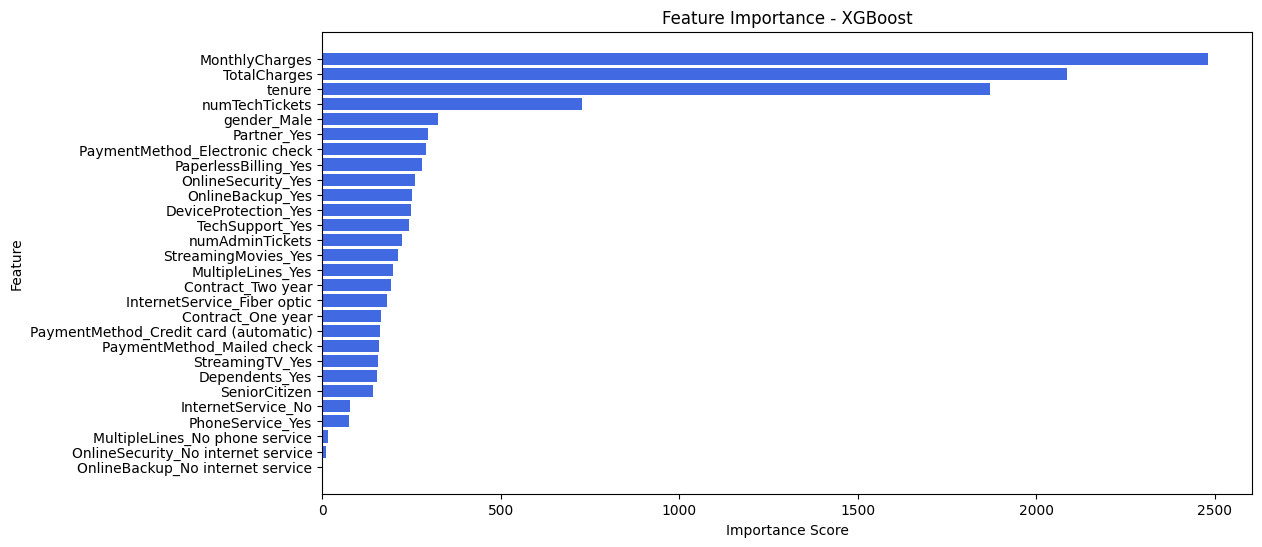

In [66]:
# Get feature importance from the trained model
feature_importance = model.get_booster().get_score(importance_type='weight')

# Convert to DataFrame for sorting & visualization
importance_df = pd.DataFrame(list(feature_importance.items()), columns=['Feature', 'Importance'])
importance_df = importance_df.sort_values(by="Importance", ascending=False)

# Plot feature importance
plt.figure(figsize=(12, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='royalblue')
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.title("Feature Importance - XGBoost")
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()

          Feature  Importance
2  MonthlyCharges      2480.0
3    TotalCharges      2086.0
1          tenure      1871.0
5  numTechTickets       727.0
6     gender_Male       326.0


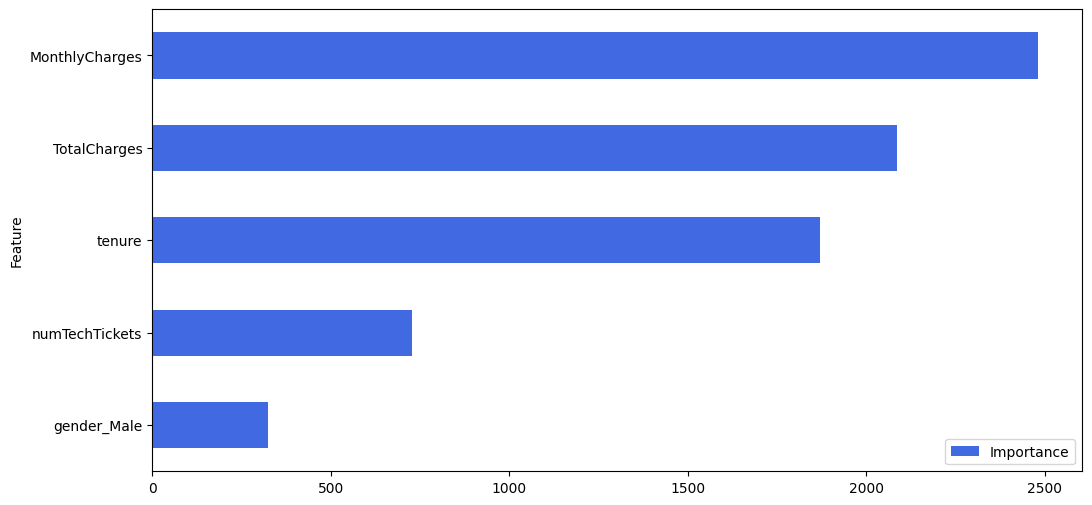

In [67]:
importance_df.head().sort_values(by='Importance', ascending=True).plot(kind='barh', x='Feature', y='Importance', color='royalblue', figsize=(12, 6))
print(importance_df.head())

<Axes: ylabel='Frequency'>

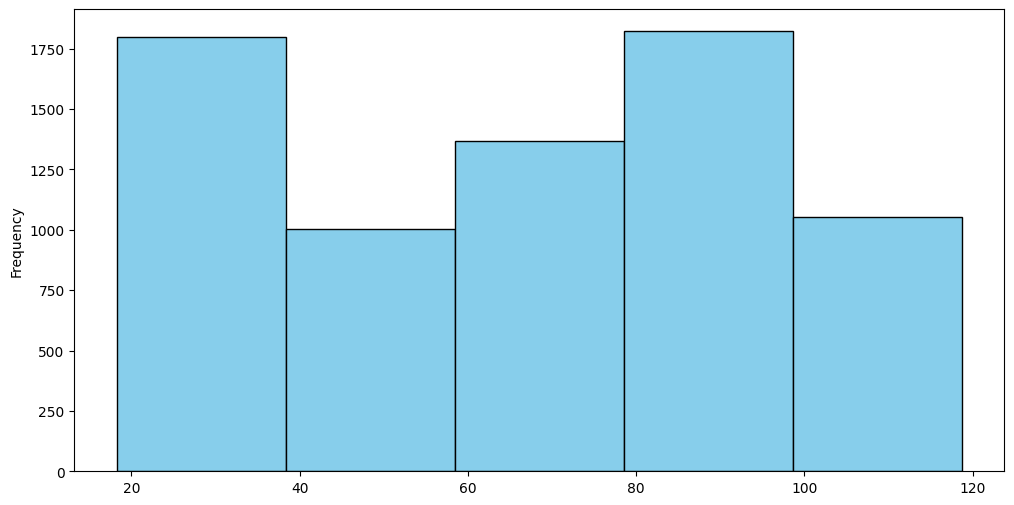

In [68]:
# Histogram of MonthlyCharges
data['MonthlyCharges'].plot(kind='hist', bins=5, color='skyblue', figsize=(12, 6), edgecolor='black')
    

In [69]:
data2.columns.to_list()

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'numAdminTickets',
 'numTechTickets',
 'Churn',
 'Churn_Probability',
 'Risk_Category']

In [70]:
data2.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,numAdminTickets,numTechTickets,Churn,Churn_Probability,Risk_Category
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,Month-to-month,Yes,Electronic check,29.85,29.85,0,0,No,77.0,High Risk
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,One year,No,Mailed check,56.95,1889.5,0,0,No,1.0,Low Risk
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,Month-to-month,Yes,Mailed check,53.85,108.15,0,0,Yes,36.0,Medium Risk
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,One year,No,Bank transfer (automatic),42.30,1840.75,0,3,No,25.0,Low Risk
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,Month-to-month,Yes,Electronic check,70.70,151.65,0,0,Yes,73.0,High Risk


In [71]:
# add monthlyCharges bin to data2
data2['MonthlyCharges_Bin'] = pd.cut(data2['MonthlyCharges'], bins=3, labels=['Low', 'Medium', 'High'])

In [72]:
# add tenure bin to data2
# add numTechTickets bin to data2
data2['Tenure_Bin'] = pd.cut(data2['tenure'], bins=3, labels=['Low', 'Medium', 'High'])
data2['NumTechTickets_Bin'] = pd.cut(data2['numTechTickets'], bins=3, labels=['Low', 'Medium', 'High'])

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = data2


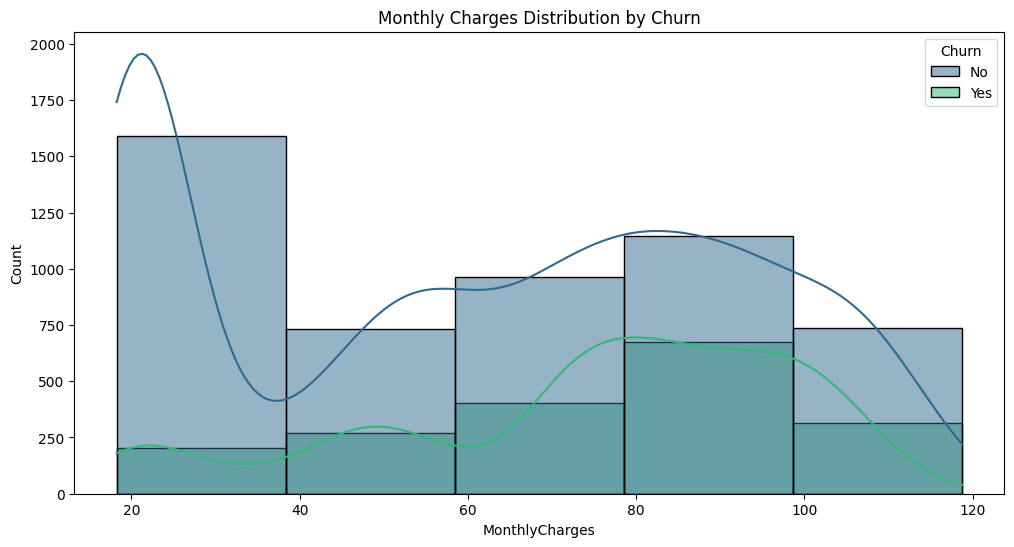

In [74]:
# plot histogram of MonthlyCharges by Churn
plt.figure(figsize=(12, 6))
sns.histplot(df, x='MonthlyCharges', hue='Churn', bins=5, kde=True, palette='viridis')
plt.title('Monthly Charges Distribution by Churn')
plt.show()


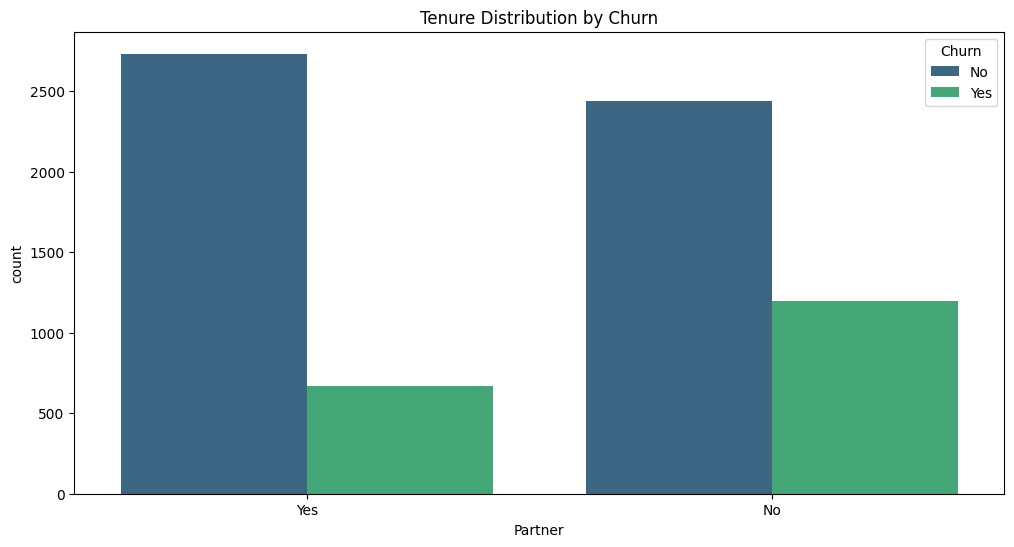

In [75]:
# plot barplot of partener by Churn
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Partner', hue='Churn', palette='viridis')
plt.title('Tenure Distribution by Churn')
plt.show()


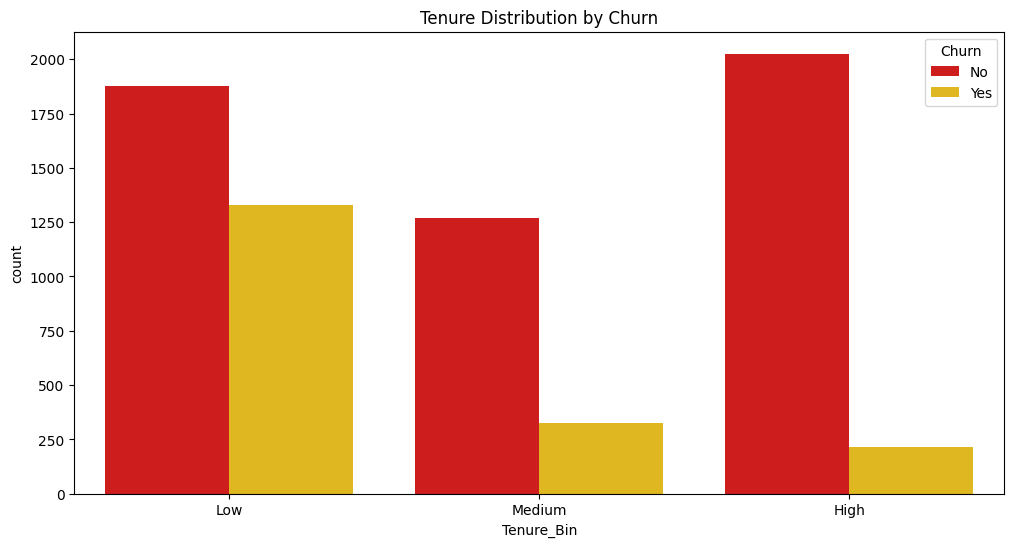

In [76]:
# plot tenure_bins and churn
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Tenure_Bin', hue='Churn', palette='hot')
plt.title('Tenure Distribution by Churn')
plt.show()


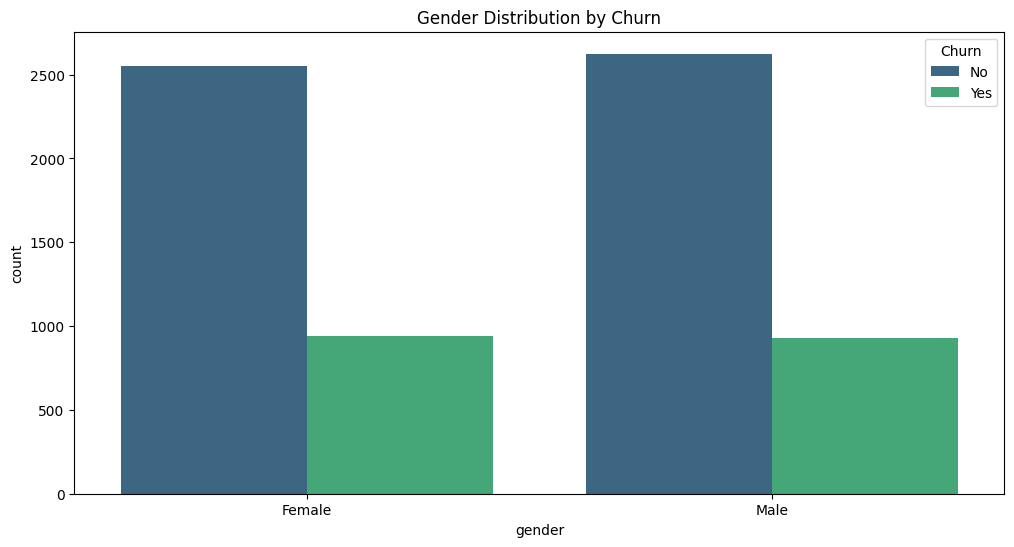

In [77]:
# plot gender and churn
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='gender', hue='Churn', palette='viridis')
plt.title('Gender Distribution by Churn')
plt.show()

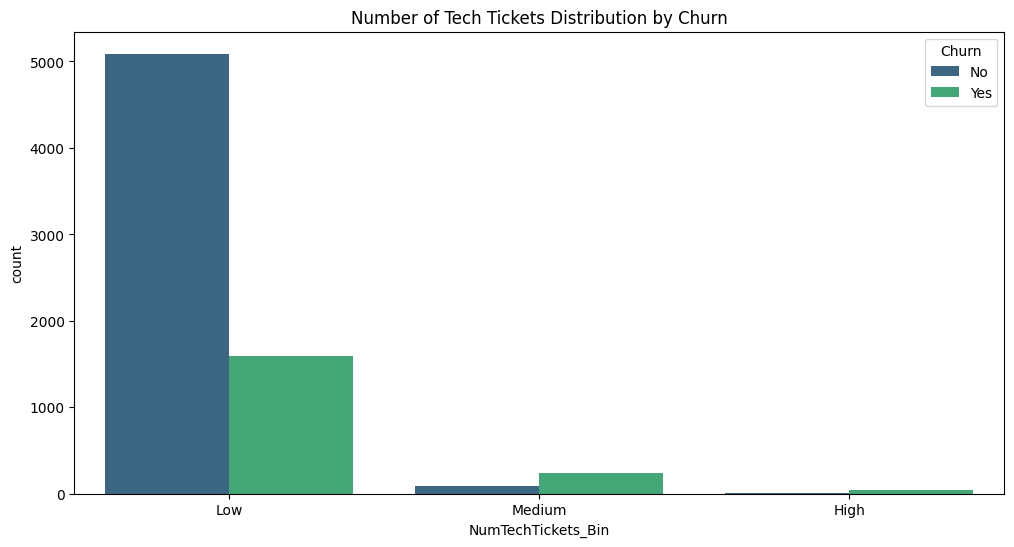

In [78]:
# plot numTechTicketsBin and churn
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='NumTechTickets_Bin', hue='Churn', palette='viridis')
plt.title('Number of Tech Tickets Distribution by Churn')
plt.show()

In [79]:
print(len(X_train.columns.to_list()))


32


In [ ]:
X_train = X_train.select_dtypes(include=['number'])
X_test = X_test.select_dtypes(include=['number'])


: 

In [ ]:
import shap

# Ensure all columns in X_test are numeric
X_test = X_test.apply(pd.to_numeric, errors='coerce').fillna(0)

# Ensure all columns in X_train are numeric
X_train = X_train.apply(pd.to_numeric, errors='coerce').fillna(0)

# Initialize SHAP explainer
explainer = shap.Explainer(model, X_train)

# Get SHAP values
shap_values = explainer(X_test)

# Summary Plot (Global feature importance)
shap.summary_plot(shap_values, X_test)



c:\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
 99%|===================| 1392/1409 [00:20<00:00]        

**Top Features in Your Model:**
- Tenure (how long a customer has been with the company)
- Number of Tech Tickets (likely related to service issues)
- Contract Type (Two-year, One-year)
- Total Charges & Monthly Charges

**Key Takeaways from Your Plot:**
Longer tenure reduces churn

**Customers with higher tenure (red) tend to stay (negative SHAP values).**
Customers with low tenure (blue) are more likely to churn.
**More Tech Support Tickets = Higher Churn Risk**

More tickets indicate dissatisfaction.
**Contract Type Matters**

Two-year contracts (red) reduce churn (negative SHAP).
Month-to-month contracts (not shown directly but implied) increase churn.
**Higher Monthly Charges Slightly Increase Churn**

Customers paying more are more likely to churn.
**Online Security & Backup Services Reduce Churn**

Customers with "OnlineSecurity_Yes" and "OnlineBackup_Yes" are more likely to stay.

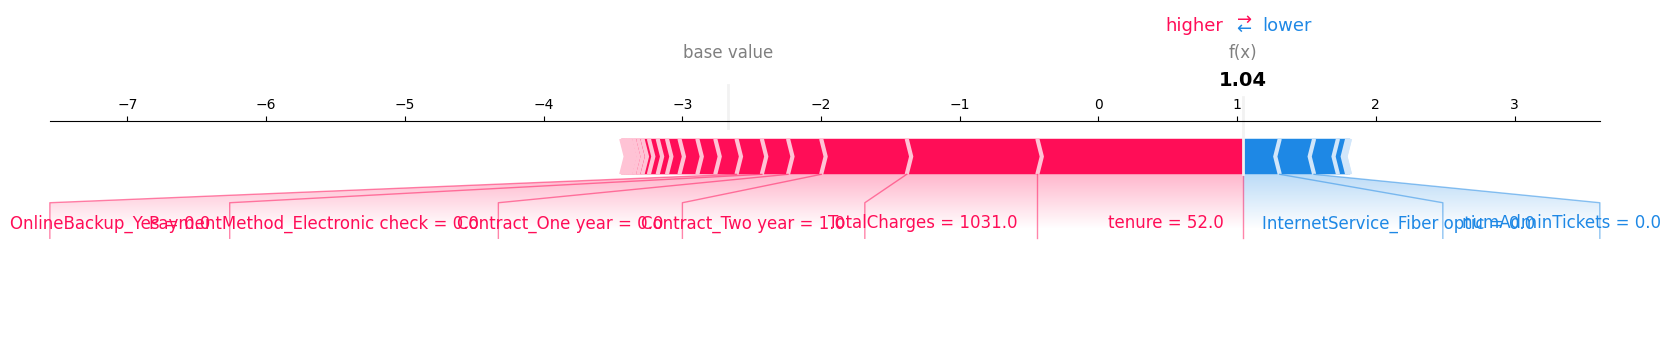

In [ ]:
import matplotlib.pyplot as plt
shap.force_plot(explainer.expected_value, shap_values.values[0], X_test.iloc[2], matplotlib=True)
shap.save_html('force_plot.html', shap.force_plot(explainer.expected_value, shap_values.values[0], X_test.iloc[2]))
plt.show()


In [ ]:
data2.to_csv('data2.csv', index=False)

In [ ]:
data2.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'numAdminTickets',
       'numTechTickets', 'Churn', 'Churn_Probability', 'Risk_Category',
       'MonthlyCharges_Bin', 'Tenure_Bin', 'NumTechTickets_Bin'],
      dtype='object')

In [ ]:
data['demographics'] = if[age]>30 